In [1]:
import pandas as pd
from sklearn.datasets import load_wine
df = load_wine()
print(df.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [3]:
wine = pd.DataFrame(df.data,columns=df.feature_names)
wine.sample(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
77,11.84,2.89,2.23,18.0,112.0,1.72,1.32,0.43,0.95,2.65,0.96,2.52,500.0
92,12.69,1.53,2.26,20.7,80.0,1.38,1.46,0.58,1.62,3.05,0.96,2.06,495.0
115,11.03,1.51,2.20,21.5,85.0,2.46,2.17,0.52,2.01,1.90,1.71,2.87,407.0
89,12.08,1.33,2.30,23.6,70.0,2.20,1.59,0.42,1.38,1.74,1.07,3.21,625.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0


In [4]:
df.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [5]:
wine['Wine'] = df.target
wine.head(3)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Wine
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0


In [6]:
#Train test split to avoid overfitting
from sklearn.model_selection import train_test_split
X = wine.drop(labels=['Wine'],axis=1)
y = wine['Wine']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=0)

In [7]:
X_train.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
22,13.71,1.86,2.36,16.6,101.0,2.61,2.88,0.27,1.69,3.80,1.11,4.00,1035.0
108,12.22,1.29,1.94,19.0,92.0,2.36,2.04,0.39,2.08,2.70,0.86,3.02,312.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
145,13.16,3.57,2.15,21.0,102.0,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830.0
71,13.86,1.51,2.67,25.0,86.0,2.95,2.86,0.21,1.87,3.38,1.36,3.16,410.0


In [8]:
from sklearn.feature_selection import mutual_info_classif
#determine the mutual information
mutual_info = mutual_info_classif(X_train,y_train)
mutual_info

array([0.41636525, 0.29481616, 0.15700285, 0.21649636, 0.17182143,
       0.47519876, 0.71712585, 0.12578016, 0.26359625, 0.6148422 ,
       0.54791971, 0.55191792, 0.5390593 ])

In [10]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False) # Finding most important features

flavanoids                      0.717126
color_intensity                 0.614842
od280/od315_of_diluted_wines    0.551918
hue                             0.547920
proline                         0.539059
total_phenols                   0.475199
alcohol                         0.416365
malic_acid                      0.294816
proanthocyanins                 0.263596
alcalinity_of_ash               0.216496
magnesium                       0.171821
ash                             0.157003
nonflavanoid_phenols            0.125780
dtype: float64

<AxesSubplot:>

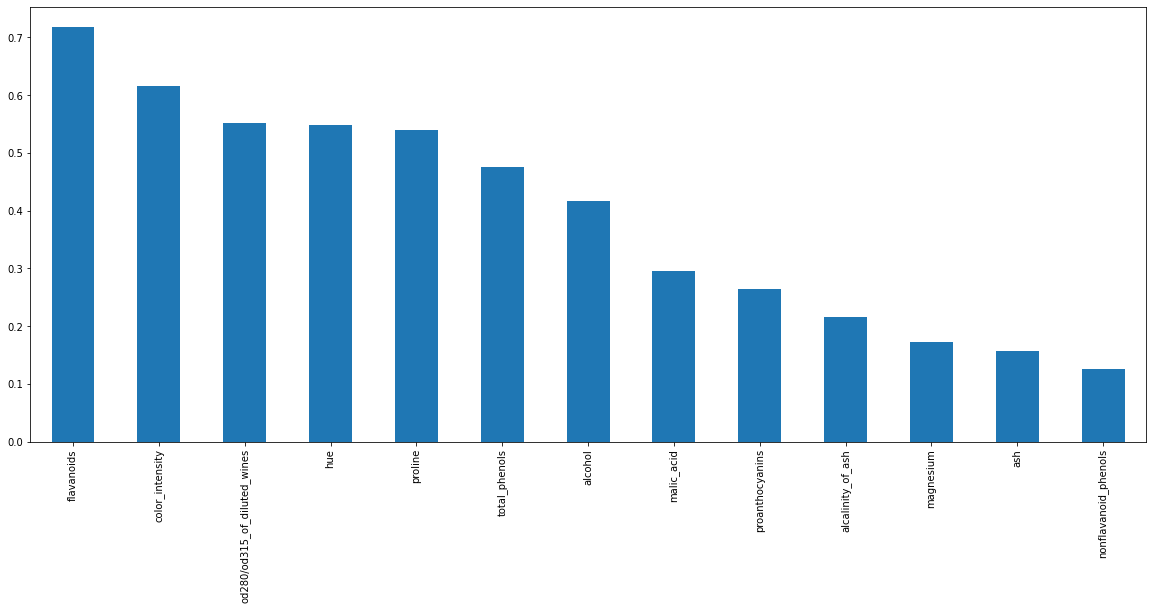

In [11]:
#Let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20,8))

In [12]:
from sklearn.feature_selection import SelectKBest

#Select best 5 important feature 
sel_five_cols = SelectKBest(mutual_info_classif,k=5)
sel_five_cols.fit(X_train,y_train)
X_train.columns[sel_five_cols.get_support()]

Index(['flavanoids', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines',
       'proline'],
      dtype='object')

In [13]:
#Let's perfrom infomation gain on regression Dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

#from sklearn.datasets import fetch_openml
#housing = fetch_openml(name="house_prices", as_frame=True)

df = pd.DataFrame(housing.data,columns=housing.feature_names)
df["HOUSE_VAL"] = housing.target

In [14]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [15]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,HOUSE_VAL
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   HOUSE_VAL   20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [17]:
from sklearn.model_selection import train_test_split
X = df.drop(labels=['HOUSE_VAL'],axis=1)
y = df['HOUSE_VAL']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [18]:
X_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
1989,1.9750,52.0,2.800000,0.700000,193.0,4.825000,36.73,-119.79
256,2.2604,43.0,3.671480,1.184116,836.0,3.018051,37.77,-122.21
7887,6.2990,17.0,6.478022,1.087912,1387.0,3.810440,33.87,-118.04
4581,1.7199,17.0,2.518000,1.196000,3051.0,3.051000,34.06,-118.28
1993,2.2206,50.0,4.622754,1.161677,606.0,3.628743,36.73,-119.81


In [19]:
from sklearn.feature_selection import mutual_info_regression

#determine the mutual information
mutual_info = mutual_info_regression(X_train.fillna(0),y_train)
mutual_info

array([0.39166784, 0.03628581, 0.10449308, 0.0330307 , 0.02819965,
       0.06238566, 0.36567193, 0.39749453])

In [20]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

Longitude     0.397495
MedInc        0.391668
Latitude      0.365672
AveRooms      0.104493
AveOccup      0.062386
HouseAge      0.036286
AveBedrms     0.033031
Population    0.028200
dtype: float64

<AxesSubplot:>

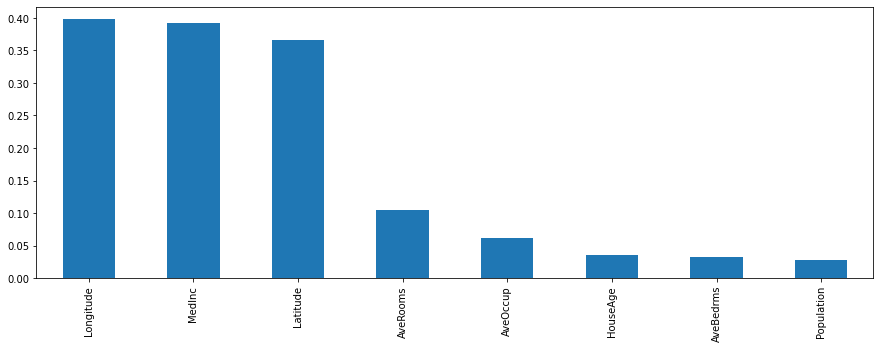

In [21]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [23]:
from sklearn.feature_selection import SelectPercentile
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=20)
selected_top_columns.fit(X_train.fillna(0), y_train)
X_train.columns[selected_top_columns.get_support()]

Index(['MedInc', 'Longitude'], dtype='object')